In [1]:
from skimage.io import imread, imshow, imsave
from skimage import img_as_float, img_as_ubyte
import numpy as np
import scipy

In [2]:
img = img_as_float(imread('test.jpg'))
width =100
height = 100
uper = np.pad(img, ((width,width),(height,height),(0,0)), 'mean')
R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]

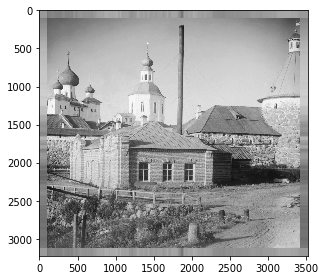

In [13]:
imshow(uper[:,:,0])

In [55]:
R.shape

(3024, 3326)

In [3]:
def rescale(ar,width,height):
    shape = ar.shape
    long = shape[0] if shape[0] > shape[1] else shape[1]
    added_img = np.zeros((2*height+shape[0],2*width+shape[1]))
    added_img[height:-height,width:-width] = ar
    added_img[0:height,width+1] = ar[0,0]
    for i in range(0,long):
        if i<shape[0]:
            added_img[height+i,0:width]=ar[i,0]   
            added_img[height+i,width+shape[1]:2*width+shape[1]]=ar[i,shape[0]]
        if i<shape[1]:
            added_img[0:height,width+i]=ar[0,i]
            added_img[height+shape[0]-1:2*height+shape[0]-1,width+i]=ar[shape[0]-1,i]    
    added_img[0:height,0:width]=ar[0,0]
    added_img[0:height,shape[1]+width:shape[1]+2*width]=ar[0,shape[0]-1]
    added_img[height+shape[0]:2*height+shape[0]-1,0:width]=ar[shape[0]-1,0]
    added_img[height+shape[0]:2*height+shape[0]-1,shape[1]+width:shape[1]+2*width]=ar[shape[0]-1,shape[1]-1]
    return added_img

In [4]:
def box(image, width, height):
    upimg = np.copy(image)
    res = np.zeros(image.shape, dtype=np.uint8)
    border = 10
    for i in range(height,image.shape[0]-height+1):
        for j in range(width,image.shape[1]-width+1):
            upimg[i,j] = np.mean(image[i-border:i+border+1,j-border:j+border+1])
    return upimg[height:-height,width:-width]

In [5]:
def median(image,width,height):
    upimg = np.copy(image)
    border = 10
    for i in range(height,image.shape[0]-height+1):
        for j in range(width,image.shape[1]-width+1):
            tmp = np.sort(image[i-border:i+border+1,j-border:j+border+1].ravel())            
            upimg[i,j]=tmp[len(tmp)//2]
    return upimg[height:-height,width:-width]

In [6]:
def gausArr(n, sigma):
    shape = (n,n)
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

In [60]:
def conv(image, width, height, arr, bordera):
    upimg = np.copy(image)        
    asum = arr.sum()if arr.sum()!=0 else 1
    borderl = bordera
    borderr = bordera if bordera!=0 else 1
    for i in range(height,image.shape[0]-height+1):
        for j in range(width,image.shape[1]-width+1):             
            upimg[i,j]=(image[i-borderl:i+borderr+1,j-borderl:j+borderr+1]*arr).sum()/asum
    return upimg

In [9]:
def rgb2gray(rgb):
    single = np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
    rgb_gray = np.uint8(np.stack((single, single, single), 2))
    return rgb_gray

In [47]:
def filter_prewitt(image, width, height):    
    operator_y = np.array(((-1,-1,-1),(0,0,0),(1,1,1)))
    yed = conv(image, width,height,operator_y,1)
    operator_x = np.array(((-1,0,1),(-1,0,1),(-1,0,1)))
    res = conv(yed,width,height, operator_x,1)
    return res

In [48]:
def sobel_filter(image, width, height):
    operator_y = np.array(((-1,-2,-1),(0,0,0),(1,2,1)))
    yed = conv(image, width,height,operator_y,1)
    operator_x = np.array(((-1,0,1),(-2,0,2),(-1,0,1)))
    res = conv(yed,width,height, operator_x,1)
    return res

In [51]:
def roberts_filter(image,width,height):
    operator_x = np.array(((-1,0),(0,1)))
    yed = conv(image,width,height, operator_x,0)
    operator_y = np.array(((0,-1),(1,0)))    
    res = conv(image,width,height, operator_y,0)
    return res

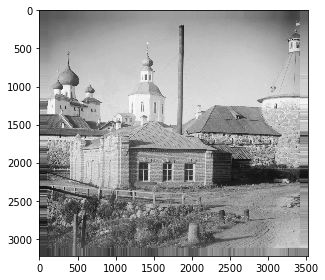

In [12]:
imshow(rescale(R,width,height)[])

In [63]:
width =100
height = 100
t = rescale(R,width,height)

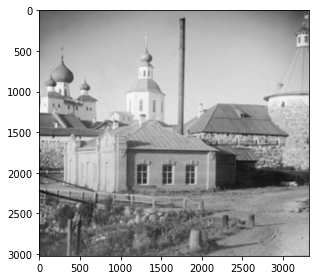

In [25]:

imshow(box(np.copy(t),width,height))

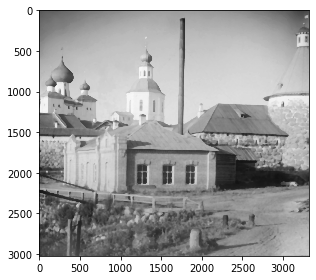

In [23]:
imshow(median(np.copy(t),width,height))

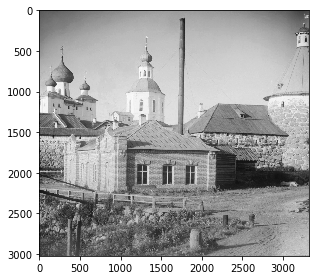

In [42]:
#gaussfilter
imshow(conv(np.copy(t),width,height,gausArr(3,0.5))[height:-height,width:-width])

In [ ]:
imshow(conv(np.copy(t),width,height,np.array(((0.9,0.5,0.7),(0.6,0.2,0.75),(0.5,0.75,0.5))),1)[height:-height,width:-width])

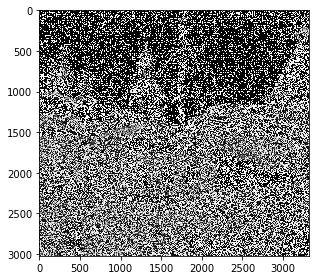

In [44]:
#for prewitt gray = rgb2gray(image) there are 3 colors like rgb
gray = rgb2gray(imread('test.jpg'))
e = filter_prewitt(np.copy(rescale(gray[:,:,0],width,height)),width,height)
ae = np.copy(gray)
ae[:,:,0] = e[height:-height,width:-width]
ae[:,:,1] = e[height:-height,width:-width]
ae[:,:,2] = e[height:-height,width:-width]
imshow(ae)

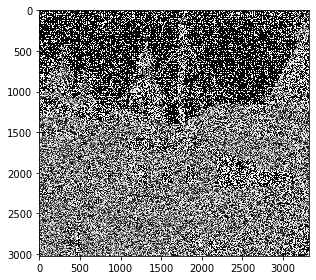

In [45]:
s = sobel_filter(np.copy(rescale(gray[:,:,0],width,height)),width,height)
ss = np.copy(gray)
ss[:,:,0] = s[height:-height,width:-width]
ss[:,:,1] = s[height:-height,width:-width]
ss[:,:,2] = s[height:-height,width:-width]
imshow(ss)

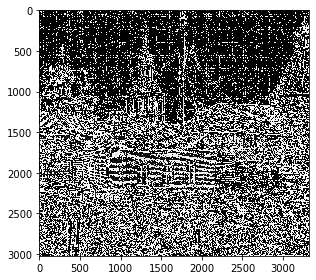

In [59]:
r = roberts_filter(np.copy(rescale(gray[:,:,0],width,height)),width,height)
rr = np.copy(gray)
rr[:,:,0] = r[height:-height,width:-width]
rr[:,:,1] = r[height:-height,width:-width]
rr[:,:,2] = r[height:-height,width:-width]
imshow(rr)